<a href="https://colab.research.google.com/github/Singularitty/AAAssignments/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem Automática - Assignment 1 

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Models and selection methods
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Binary classifier metrics
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
# Linear regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr

In [ ]:
# Funcoes auxiliares
def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

def CrossValidation(X_TRAIN, y_TRAIN, kf, model):
    TRUTH=None
    PREDS=None
    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        if TRUTH is None:
            PREDS=preds
            TRUTH=y_test
        else:
            PREDS=np.hstack((PREDS, preds))
            TRUTH=np.hstack((TRUTH, y_test))
    return (TRUTH, PREDS)

def displayPlot(preds, truth):
    plt.figure(figsize=(5,5))
    plt.scatter(preds, truth)
    plt.axline((0, 0), slope=1, color="red")
    plt.grid()
    plt.show()

def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds))
    print("The Recall is: %7.4f" % recall_score(truth, preds))
    print("The F1 score is: %7.4f" % f1_score(truth, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(truth, preds)))

## Objective 1
Preparação do dataset

In [15]:
# Criar dataframe
parkinsons_objective1 = pd.read_csv("parkinsons_updrs.data")
# Remover a coluna total_UPDRS e subject#
parkinsons_objective1.drop(columns=["subject#","total_UPDRS"], inplace=True)
# Divisão do dataset em variaveis independentes e dependentes
X_obj1 = parkinsons_objective1[set(parkinsons_objective1.columns) - {"motor_UPDRS"}]
y_obj1 = parkinsons_objective1["motor_UPDRS"]
# Converter para np array
Xc_obj1 = X_obj1.to_numpy()
yc_obj1 = y_obj1.to_numpy()
# Divisão do dataset em training set e independent validation set
X_obj1_TRAIN, X_obj1_IVS, y_obj1_TRAIN, y_obj1_IVS = train_test_split(Xc_obj1, yc_obj1, test_size=0.10, random_state=314)
# Kfold split dos dados de treino
kf1 = KFold(n_splits=16, shuffle=True, random_state = 274)

### Fitting e validação dos modelos

##### Decision Tree Regressor

In [16]:
params = [
    {"max_depth" : [6,8,10,12,14,16,18,20,22,24,26,28,30],
    "min_samples_leaf" : [1,5,10,20],
    "min_samples_split" : [2,5,10,20]}]

grid_search = GridSearchCV(
    DecisionTreeRegressor(), params, scoring="neg_mean_squared_error", cv=kf1 , n_jobs=-1)

grid_search.fit(X_obj1_TRAIN, y_obj1_TRAIN)
print(grid_search.best_params_)

KeyboardInterrupt: ignored

In [ ]:
printRegStatistics(*CrossValidation(X_obj1_TRAIN, y_obj1_TRAIN, kf1, DecisionTreeRegressor(**grid_search.best_params_)))

NameError: ignored

#### Modelos Lineares

Regressão Linear

In [ ]:
printRegStatistics(*CrossValidation(X_obj1_TRAIN, y_obj1_TRAIN, kf1, LinearRegression()))

Ridge

In [ ]:
params_linear = [
    {"alpha" : [x*0.01 for x in range(1,100)]}]

grid_search_ridge = GridSearchCV(
    Ridge(), params_linear, scoring="neg_mean_squared_error", cv=kf1, n_jobs=-1)

grid_search_ridge.fit(X_obj1_TRAIN, y_obj1_TRAIN)
print(grid_search_ridge.best_params_)

In [ ]:
printRegStatistics(*CrossValidation(X_obj1_TRAIN, y_obj1_TRAIN, kf1, grid_search_ridge.best_estimator_))

LASSO

In [ ]:
params_linear = [
    {"alpha" : [x*0.001 for x in range(1,100)]}]

grid_search_lasso = GridSearchCV(
    Lasso(), params_linear, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)

grid_search_lasso.fit(X_obj1_TRAIN, y_obj1_TRAIN)
print(grid_search_lasso.best_params_)

In [ ]:
printRegStatistics(*CrossValidation(X_obj1_TRAIN, y_obj1_TRAIN, kf1, grid_search_lasso.best_estimator_))

### Validação do Melhor Modelo

The RVE is:  0.88061064319521
The rmse is:  2.7851371974518098
The Correlation Score is is: 0.9404 (p-value=9.949585e-277)

The Maximum Error is is:  20.366000000000003
The Mean Absolute Error is:  0.8633773705517839


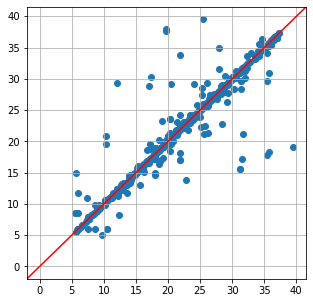

In [ ]:
# Melhor modelo foi DecisionTreeRegressor, com os seguintes parametros:
# {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 5}
obj1_model = DecisionTreeRegressor(max_depth=18, min_samples_leaf=1, min_samples_split=5)
obj1_model.fit(X_obj1_TRAIN, y_obj1_TRAIN)
obj1_IVS_preds = obj1_model.predict(X_obj1_IVS)
printRegStatistics(y_obj1_IVS, obj1_IVS_preds)
displayPlot(obj1_IVS_preds, y_obj1_IVS)

## Objective 2
Preparação do dataset

In [ ]:
# Criar dataframe
parkinsons_objective2 = pd.read_csv("parkinsons_updrs.data")
# Remover a coluna subject# e motor_UPDRS
parkinsons_objective2.drop(columns=["subject#","motor_UPDRS"], inplace=True)
# Transformação de total_UPDRS em variavel binaria
parkinsons_objective2["total_UPDRS"] = parkinsons_objective2["total_UPDRS"].apply(lambda x : 1 if x > 40 else 0)
X_obj2 = parkinsons_objective2[set(parkinsons_objective2.columns) - {"total_UPDRS"}]
y_obj2 = parkinsons_objective2["total_UPDRS"]
# Converter para np array
Xc_obj2 = X_obj2.to_numpy()
yc_obj2 = y_obj2.to_numpy()
# Divisprint(y_obj2)ão do dataset em training set e independent validation set
X_obj2_TRAIN, X_obj2_IVS, y_obj2_TRAIN, y_obj2_IVS = train_test_split(Xc_obj2, yc_obj2, test_size=0.10, random_state=314)
# Kfold split
kf2 = KFold(n_splits=16, shuffle=True, random_state = 274)

##### Decision Tree Classifier

In [ ]:
params = [
    {"max_depth" : [6,8,10,12,14,16,18,20,22,24,26,28,30],
    "min_samples_leaf" : [1,5,10,20],
    "min_samples_split" : [2,5,10,20],
    "criterion":['gini','entropy']}
]

grid_search = GridSearchCV(
    DecisionTreeClassifier(), params, scoring="", cv=kf2, n_jobs=-1)

grid_search.fit(X_obj2_TRAIN, y_obj2_TRAIN)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, 22, 24,
                                        26, 28, 30],
                          'min_samples_leaf': [1, 5, 10, 20],
                          'min_samples_split': [2, 5, 10, 20]}])

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 28,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=28, min_samples_leaf=1, min_samples_split=10)
dt = dt.fit(X_obj2_TRAIN, y_obj2_TRAIN)
ivs_obj2_preds= dt.predict(X_obj2_IVS)
printClassResults(y_obj2_IVS, ivs_obj2_preds)

The Accuracy is:  0.9949
The Precision is:  0.9800
The Recall is:  0.9899
The F1 score is:  0.9849
The Matthews correlation coefficient is:  0.9819

This is the Confusion Matrix
     0   1
0  487   2
1    1  98


## Modelo Linear para classificação

Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
#X_obj2_TRAIN, X_obj2_IVS, y_obj2_TRAIN, y_obj2_IVS
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_obj2_TRAIN)
X_train = scaler.transform(X_obj2_TRAIN)
X_test = scaler.transform(X_obj2_IVS)

In [ ]:
mdl = LogisticRegression(random_state=0).fit(X_train, y_obj2_TRAIN)

In [ ]:
print("The bias is: ", mdl.intercept_[0])
print("The other parameters are: ")
for i, beta in enumerate(mdl.coef_[0]):
    print("\t B%02d -> %9.3f" % (i + 1, beta))



The bias is:  -1.8496746788452687
The other parameters are: 
	 B01 ->    -0.414
	 B02 ->     0.665
	 B03 ->    -0.724
	 B04 ->    -0.636
	 B05 ->    -0.692
	 B06 ->    -0.090
	 B07 ->     0.965
	 B08 ->    -0.446
	 B09 ->    -0.090
	 B10 ->     0.554
	 B11 ->    -0.387
	 B12 ->    -0.093
	 B13 ->     0.287
	 B14 ->    -0.006
	 B15 ->    -0.251
	 B16 ->     0.616
	 B17 ->    -0.264
	 B18 ->    -0.154
	 B19 ->     0.651


In [ ]:
coefs = [(abs(beta), i) for i, beta in enumerate(mdl.coef_[0])]
coefs.sort()
coefs.reverse()
for beta, i in coefs[:5]:
    print("\t B%02d -> %9.3f" % (i + 1, beta))

	 B07 ->     0.965
	 B03 ->     0.724
	 B05 ->     0.692
	 B02 ->     0.665
	 B19 ->     0.651


In [ ]:
#preds = mdl.predict(X_test)

#printClassResults(y_obj2_IVS, preds)